In [1]:
%pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

import sys
sys.path.append('parser')

from parser import IsstPerfProfile

In [3]:
files = glob.glob('results/*.datafile')
files

['results/2025-02-17.datafile']

In [4]:
result = IsstPerfProfile.parse(files[0])
result.profiles

[Profile(package=1, die=0, cpu=56, level=0, turbo_levels=[TurboRatioLevel(level='0', core_count=1, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=2, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=3, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=4, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=5, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=6, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=7, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=8, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=9, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=10, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=11, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=12, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=13, max_turbo_frequency_mhz=3800), Tu

In [5]:
print(result.profiles[0].turbo_levels)

[TurboRatioLevel(level='0', core_count=1, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=2, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=3, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=4, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=5, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=6, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=7, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=8, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=9, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=10, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=11, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=12, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=13, max_turbo_frequency_mhz=3800), TurboRatioLevel(level='0', core_count=14, max_turbo_frequen

In [6]:
license_level_to_name = {
    '0': 'SSE',
    '1': 'AVX2',
    '2': 'AVX512',
    '3': 'AMX'
}

LIC_NAME = 'License name'
CORE_COUNT = 'Number of active cores'
MAX_TURBO_FREQ = 'Maximum opportunistic turbo frequency [MHz]'

freq_vs_number_of_cores = pd.DataFrame(result.profiles[0].turbo_levels)
freq_vs_number_of_cores[LIC_NAME] = freq_vs_number_of_cores['level'].apply(lambda v: license_level_to_name[v])
freq_vs_number_of_cores[CORE_COUNT] = freq_vs_number_of_cores['core_count']
freq_vs_number_of_cores[MAX_TURBO_FREQ] = freq_vs_number_of_cores['max_turbo_frequency_mhz']

freq_vs_number_of_cores
        

,level,core_count,max_turbo_frequency_mhz,License name,Number of active cores,Maximum opportunistic turbo frequency [MHz]
0,0,1,3800,SSE,1,3800
1,0,2,3800,SSE,2,3800
2,0,3,3800,SSE,3,3800
3,0,4,3800,SSE,4,3800
4,0,5,3800,SSE,5,3800
...,...,...,...,...,...,...
275,3,52,2200,AMX,52,2200
276,3,53,2200,AMX,53,2200
277,3,54,2200,AMX,54,2200
278,3,55,2200,AMX,55,2200


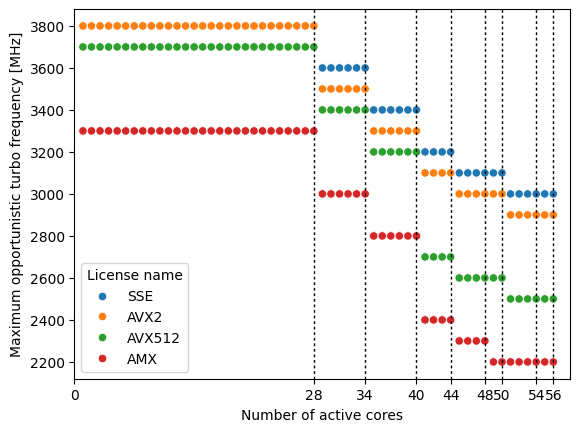

In [7]:
# sns.set_theme(rc={'figure.figsize':(10, 6), 'legend.fontsize': 13, 'font.size': 13})
ax = sns.scatterplot(data=freq_vs_number_of_cores, x=CORE_COUNT, y=MAX_TURBO_FREQ, hue=LIC_NAME)
# plt.legend(ncol=4, bbox_to_anchor=(0.5, -0.1), loc="upper center")

buckets = [28,34,40,44,48,50,54,56]

for i in buckets:
    plt.axvline(x=i, color='black', dashes=[2], linewidth=1)

# ax.set_ylim(0, 4000)
ax.set_xlim(0, 58)
ax.set_xticks([0] + buckets)

plt.savefig('../../thesis/fig/avx-frequency-license-bands.pdf', bbox_inches='tight')